In [ ]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#renaming the column names as follows:- 
#First 10 are independent variables and only 1 variable is dependent variable[Glass_type] which is a categorical variable.
#and hence we are using Logistic Regression.

dataset=pd.read_csv('/content/glass.data',sep=',', header = None)
dataset.columns = ['Id','Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_type']


In [ ]:
#printing the dwhole dataset
dataset

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
#head function of pandas give the first five rows of the dataframe
#we can even change the number by passing a parameter to it.
dataset.head()


,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#shape function gives the dimensionality of the dataframe; like (rows*columns).
dataset.shape

(214, 11)

In [ ]:
#using np.unique() method, we can get all the unique values.
#We are doing this just to make sure that our variable is categorical and what are the unique values it has.

print(np.unique(dataset['Glass_type']))

[1 2 3 5 6 7]


In [ ]:
#isnull().sum() checks for all the missing values in the dataframe and calculate their count.

dataset.isnull().sum()

Id                  0
Refractive Index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Glass_type          0
dtype: int64

In [ ]:
#it gives the mathematical description of data like percentiles, standard deviation, etc.
dataset.describe()  

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#a) Data Visualization


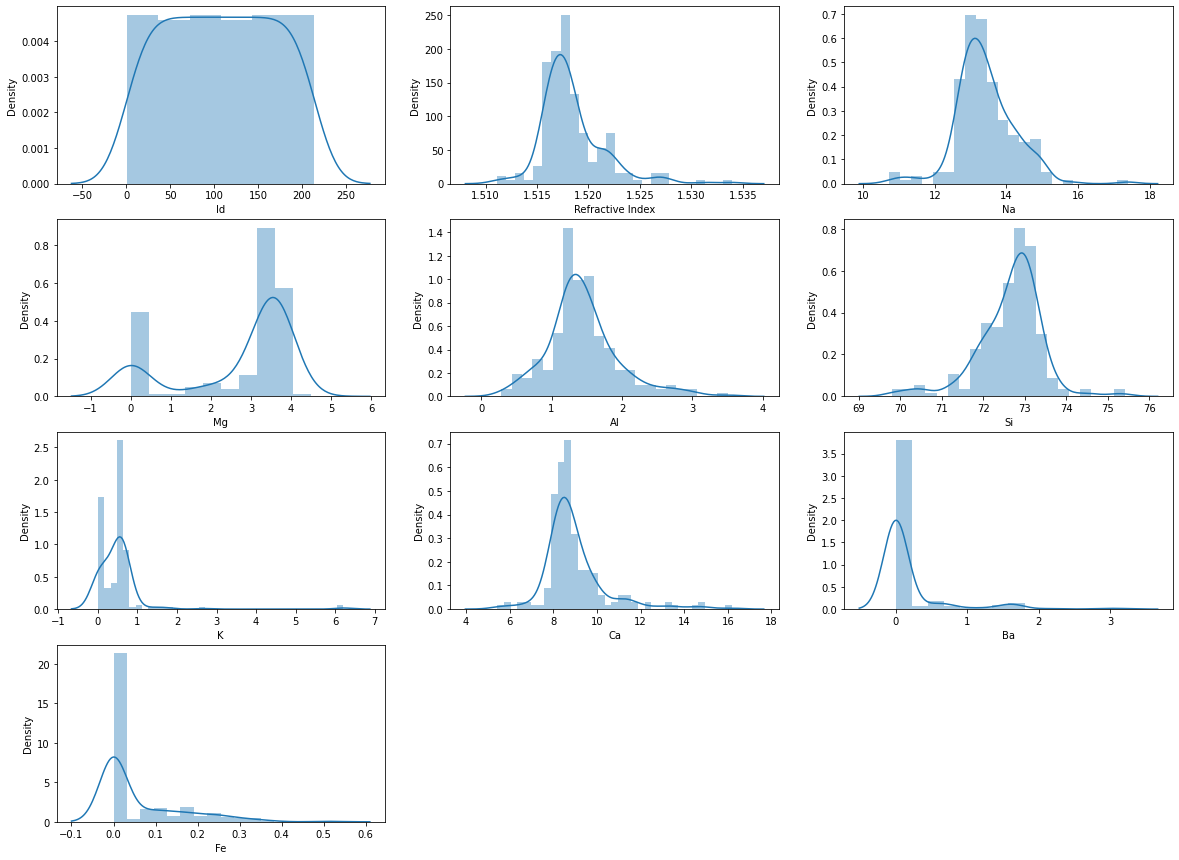

In [ ]:
#We are using distplot i.e. histogram to visualise the data. It is plotted for continous variables.

#As the target variable[Glass_type] is a categorical variable so distplot is not a good option.
#We will laterplot a countplot i.e. Bar plot for this categorial variable.

plt.figure(figsize=(20, 15))                    #used to manipulate the size of the plots.
columns = list(dataset.columns)
for i in range(10):
  plt.subplot(4, 3, i+1)                        #subplot is used to draw multiple plots in one figure; rows = 4, cols = 3 and thirs parameter is plot number which starts from 1.
  sns.distplot(dataset[columns[i]])
plt.show()

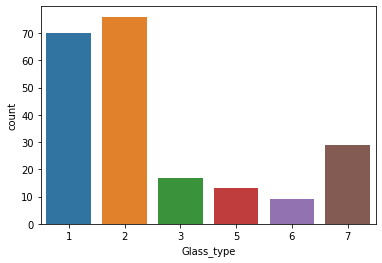

In [ ]:
#our target variable is categorical hence we have used count plot.
#why count plot? because it is used to check frequency distribution of a categorical variable.
sns.countplot(dataset['Glass_type'])
plt.show()

<Figure size 1440x720 with 0 Axes>

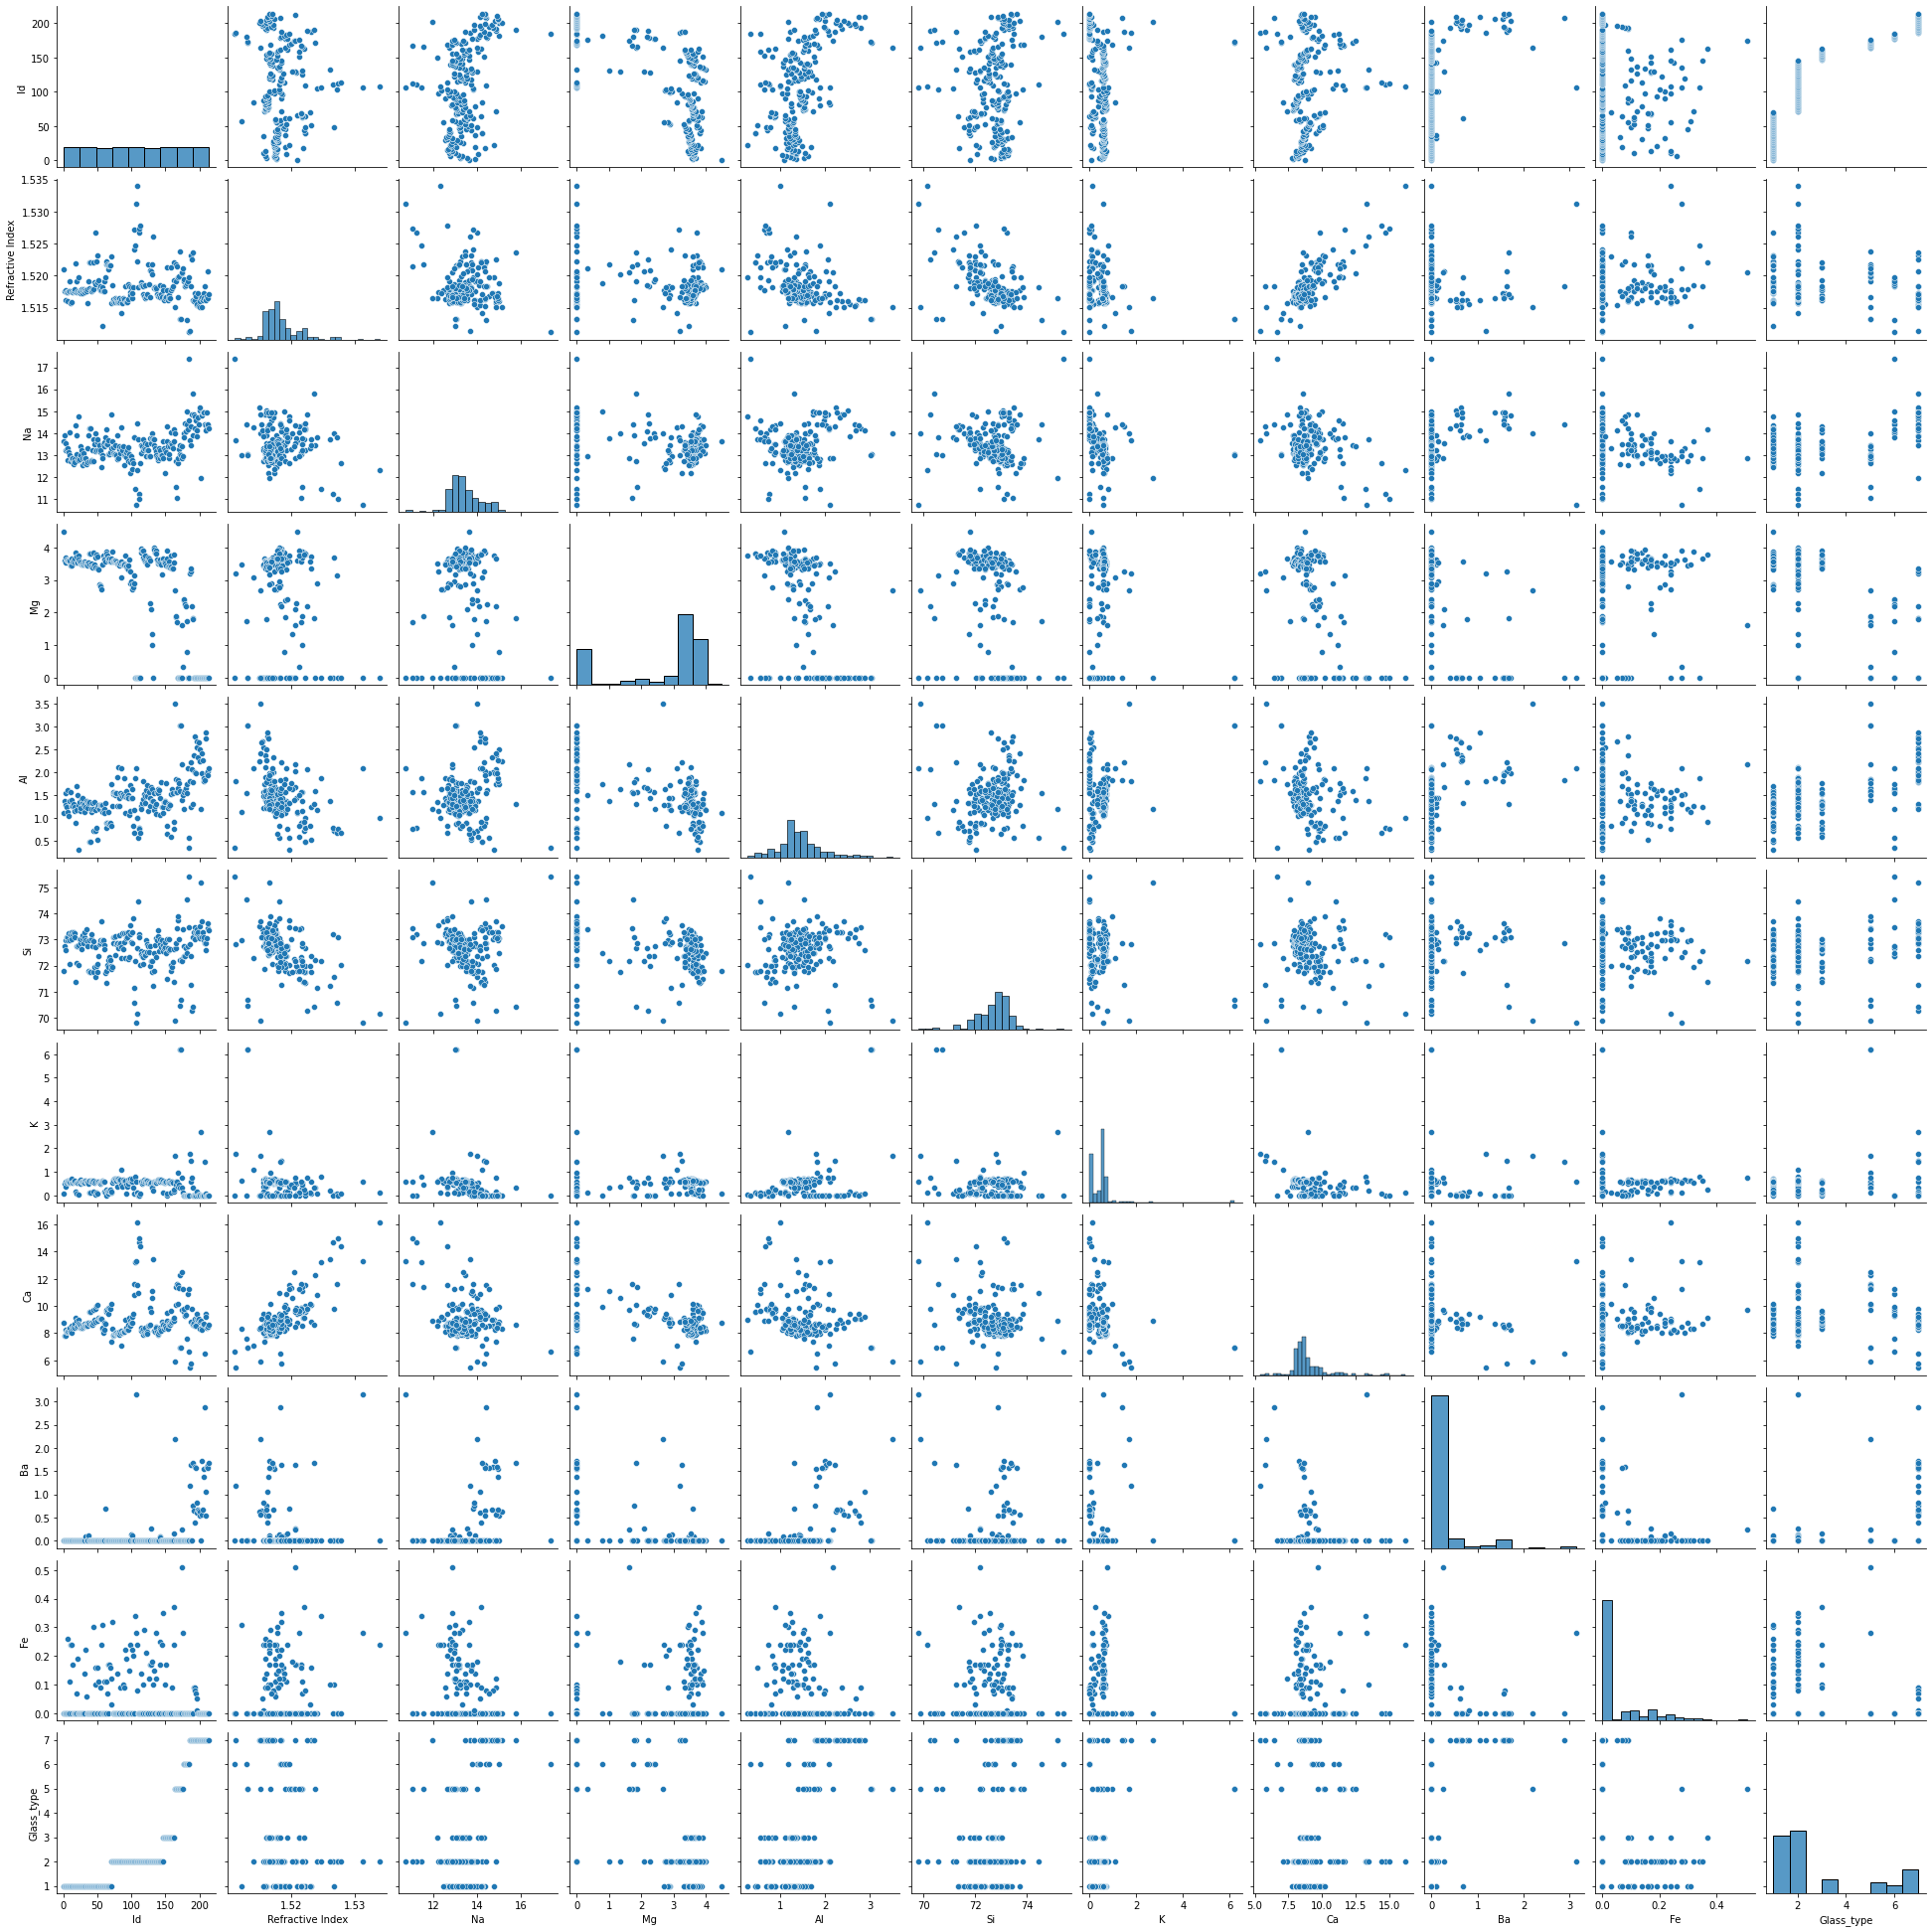

In [ ]:
#Pair plots are used to plot pairwise relationships in dataset.
#It creates scatterplot for joint relationship (i.e. different x-axis and y-axis) and histogram for univariate variable (i.e. same x-axis and y-axis )

plt.figure(figsize=(20, 10))             #used to manipulate the size of the plots.
sns.pairplot(dataset)
plt.show()

In [ ]:
#to check relation betweem all variables, we will find corelation between them
#its very difficult to read this data hence we will make a heat map so as to understand which are corelated variables.

dataset.corr()

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
Refractive Index,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


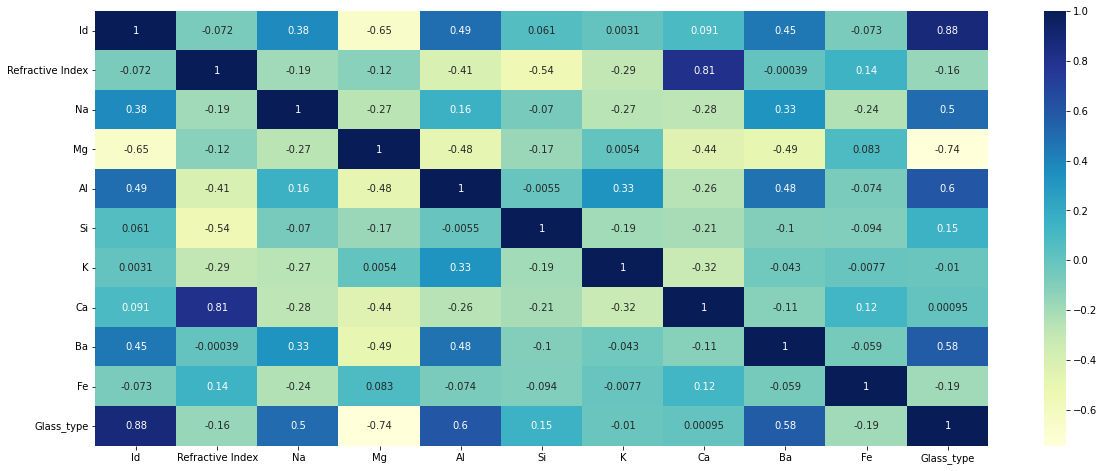

In [ ]:
#Using heatmap, we study correlation between variables i.e. how much two variables are corelated.

plt.figure(figsize=(20, 8))
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
#By heatmap we can see that Glass_type and Id are very much co-related and we cant drop Glass_type because its our target variable and hence we will drop Id.
#Although its not necessary but we will drop the Id column.

dataset.drop(['Id'], axis=1, inplace=True)

In [ ]:
#gives dimensionality, rows*columns.

dataset.shape

(214, 10)

#Logistic regression model to predict the target variable.

In [ ]:
#seperating dependent and independent variable and making X dataframe having all independent variables and Y dataframe having all dependent variables.
X=dataset.drop(['Glass_type'], axis=1)
Y=dataset['Glass_type']
print(X.shape)
print(Y.shape)

(214, 9)
(214,)


In [ ]:
#splitting the dataset into training dataset and test dataset
#0.2 i.e. 20% of the data is test data. and 0.8 i.e. 80% of the data = training data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#It is important to perform feature scaling here because Si(silicon) and Ba(Barium)/Fe(Iron) values lie in very different ranges. 
#If we don’t scale the features then the Si feature will dominate the Ba/Fe feature when the model finds the nearest neighbor to a data point in the data space.

scx = StandardScaler()
Xtrain = scx.fit_transform(X_train) 
Xtest = scx.transform(X_test)

In [ ]:
#printing the size of train and test dataset.
print(Xtest.shape)
print(Y_test.shape)
print(Xtrain.shape)
print(Y_train.shape)

(43, 9)
(43,)
(171, 9)
(171,)


In [ ]:
#Fit the model Logistic Regression over the training dataset.
model = LogisticRegression()
model.fit(Xtrain,Y_train)

LogisticRegression()

In [ ]:
#After fitting the model we will use that model over test dataset (preferable X_test) to see the prediction.
Y_pred_test=model.predict(Xtest)
Y_pred_train=model.predict(Xtrain)


#Accuracy and other metrics of the model (like precision, recall, F1 score).

In [ ]:
#Accuracy is one metric for evaluating classification models. 
#Accuracy is the fraction of Number of correct predictions to the total number of predictions.

acc= metrics.accuracy_score(Y_test, Y_pred_test)
print('Value of Accuracy: {}'.format(acc*100))

Value of Accuracy: 53.48837209302325


In [ ]:
# Precision answers: What proportion of positive identifications was actually correct?
# i.e. ability of a classification model to identify only the relevant data points.

prec=metrics.precision_score(Y_test, Y_pred_test,average='weighted')
print('Value of Precision: {}'.format(prec*100))

Value of Precision: 52.76162790697675


In [ ]:
# Recall answer: What proportion of actual positives was identified correctly?
#i.e. ability of a classification model to find all the relevant cases within a data set.

recall_score=metrics.recall_score(Y_test, Y_pred_test,average='weighted')
print('Value of Recall: {}'.format(recall_score*100))

Value of Recall: 53.48837209302325


In [ ]:
# F1-score is a measure of a model's accuracy on a dataset.

f1_score=metrics.f1_score(Y_test, Y_pred_test,average='weighted')
print('Value F1_score: {}'.format(f1_score*100))

Value F1_score: 51.406423034330004


#### Recall is most relevant metric here because we cant rely on accuracy or prediction. The formula of Recall = TP/(TP+FN). Recall places a high importance on reducing the number of false negatives, eg positive cases that are misclassified by the model as negatives.
